#  <font color='dark gary'> K-Means with dynamic time warping Anomaly detection method
## Tslearn, A Machine Learning Toolkit for Time Series Data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
def show(df):
    data = pd.DataFrame(np.squeeze(df))
    return data

# Methods for variable-length time series
- tslearn.clustering.TimeSeriesKMeans

### K-Means Clustering Classification
- https://tslearn.readthedocs.io/en/stable/gettingstarted.html#time-series-format
- 첫 번째 차원은 군집 분석을 하기 위한 기준값(인스턴스)이고 두 번째 차원은 특성 그리고 세 번째 차원은 시간이다. 즉, (기준값 x 특성 x 시간) 
       * 국건영자료는 특성이 1개(단변량), 다변량일 경우는 tensor축을 사용하여야 함
https://tootouch.github.io/contest%20review/kdx_dashboard_part2/

### <font color='purple'> Data Format 이해하기
1. 단변량 시계열자료 (3개 인스턴스, 5개 시계열), (3,5,1)의 자료를 약간 변형

In [3]:
from tslearn.generators import random_walks
X = random_walks(n_ts=3, sz=5, d=1)
X.shape
X

(3, 5, 1)

array([[[-0.28181757],
        [ 0.00494119],
        [ 1.00948465],
        [ 1.04733765],
        [ 0.56901922]],

       [[ 1.05436054],
        [ 3.0932544 ],
        [ 0.47490245],
        [-0.355943  ],
        [ 0.23145058]],

       [[-0.58702557],
        [-1.35605328],
        [-1.88671937],
        [-2.24614949],
        [-3.16958951]]])

In [4]:
pd.DataFrame(np.squeeze(X), 
             index = ['company1','company2','company3'],
             columns=['var1', 'var2', 'var3', 'var4', 'var5'])

,var1,var2,var3,var4,var5
company1,-0.281818,0.004941,1.009485,1.047338,0.569019
company2,1.054361,3.093254,0.474902,-0.355943,0.231451
company3,-0.587026,-1.356053,-1.886719,-2.246149,-3.169590


2. 다변량 시계열자료 (3개 인스턴스, 5개 시계열)
- feature가 2개인 경우

In [5]:
X = random_walks(n_ts=3, sz=5, d=2)
X.shape
X

(3, 5, 2)

array([[[-0.38026312,  0.1406937 ],
        [-0.38380041,  1.02340612],
        [-0.9385036 , -0.48669747],
        [-0.62764822, -1.3314817 ],
        [ 1.2879996 , -1.69153772]],

       [[-0.22119669, -1.61603554],
        [-1.28514606, -1.66979239],
        [-0.9364275 , -2.37446659],
        [-1.10764759, -1.26053761],
        [-1.02149838, -0.70338896]],

       [[-0.53181514, -0.31618123],
        [ 1.53956285,  0.8190424 ],
        [-1.19537652, -0.70361422],
        [-1.4697364 ,  1.25969569],
        [-2.05665135,  1.18896962]]])

In [6]:
X[:, :, 0]
X[:, :, 1]

array([[-0.38026312, -0.38380041, -0.9385036 , -0.62764822,  1.2879996 ],
       [-0.22119669, -1.28514606, -0.9364275 , -1.10764759, -1.02149838],
       [-0.53181514,  1.53956285, -1.19537652, -1.4697364 , -2.05665135]])

array([[ 0.1406937 ,  1.02340612, -0.48669747, -1.3314817 , -1.69153772],
       [-1.61603554, -1.66979239, -2.37446659, -1.26053761, -0.70338896],
       [-0.31618123,  0.8190424 , -0.70361422,  1.25969569,  1.18896962]])

In [8]:
print('Time 0 시점')
pd.DataFrame(X[:, :, 0], 
             index = ['company1','company2','company3'],
             columns=['var1', 'var2', 'var3', 'var4', 'var5'])

print('Time 1 시점')
pd.DataFrame(X[:, :, 1], 
             index = ['company1','company2','company3'],
             columns=['var1', 'var2', 'var3', 'var4', 'var5'])

Time 0 시점


,var1,var2,var3,var4,var5
company1,-0.380263,-0.383800,-0.938504,-0.627648,1.288000
company2,-0.221197,-1.285146,-0.936427,-1.107648,-1.021498
company3,-0.531815,1.539563,-1.195377,-1.469736,-2.056651


Time 1 시점


,var1,var2,var3,var4,var5
company1,0.140694,1.023406,-0.486697,-1.331482,-1.691538
company2,-1.616036,-1.669792,-2.374467,-1.260538,-0.703389
company3,-0.316181,0.819042,-0.703614,1.259696,1.188970


### 관측치 50개 변수 32개 데이터 생성

In [9]:
from tslearn.generators import random_walks
X = random_walks(n_ts=50, sz=32, d=1)
X.shape

(50, 32, 1)

In [10]:
import numpy as np
X_2d = np.squeeze(X)
data = pd.DataFrame(X_2d, index = pd.util.testing.makeTimeDataFrame(X_2d.shape[0], freq="D").index)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
2000-01-01,0.123940,0.560619,-0.010649,1.136905,2.444169,1.969493,2.898814,2.145018,0.187035,1.509345,...,-0.556774,0.756141,1.791637,1.449100,2.386616,2.464027,3.033362,3.647208,3.038900,3.664699
2000-01-02,0.972910,0.952443,1.243496,1.624671,1.710473,1.754245,1.133053,-0.736738,-0.404597,-2.269016,...,-8.308682,-9.663209,-10.706552,-11.774595,-13.467345,-13.887757,-14.305003,-15.859380,-16.685927,-15.997553
2000-01-03,-0.429494,0.547894,1.143615,2.402638,1.755947,0.667637,0.499232,0.263899,-1.084964,-0.045275,...,-1.018119,-0.761378,0.010328,0.952734,3.182137,4.797308,4.481262,3.903763,2.886672,1.635890
2000-01-04,-2.772647,-0.925347,-0.872191,1.179622,-0.228079,-0.870684,-2.504026,-1.225299,-1.548027,-2.378686,...,-3.589453,-2.274050,-1.953269,-2.094944,-3.041284,-2.454265,-1.655737,-1.829478,-3.319362,-2.013051
2000-01-05,-0.710360,-0.743931,0.381072,1.027830,0.850871,1.368648,0.439129,1.322257,0.528278,-0.177877,...,3.049620,2.536413,2.469480,4.066094,3.804725,1.540471,1.450099,1.069514,-0.911582,-1.005945


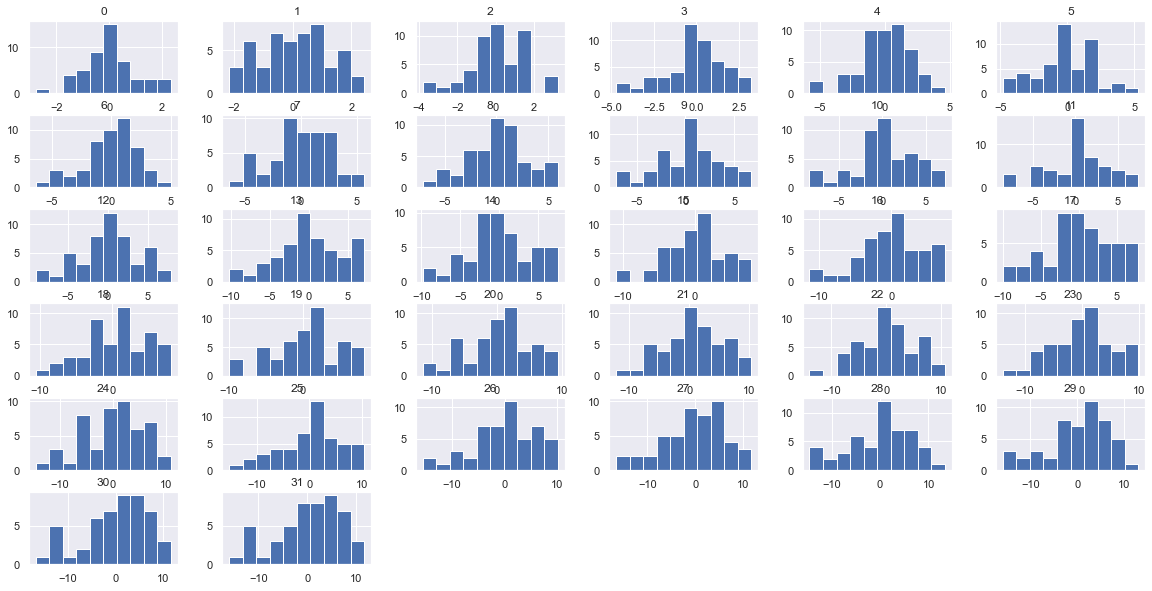

In [11]:
ax = data.hist(figsize=(20,10))

<AxesSubplot:>

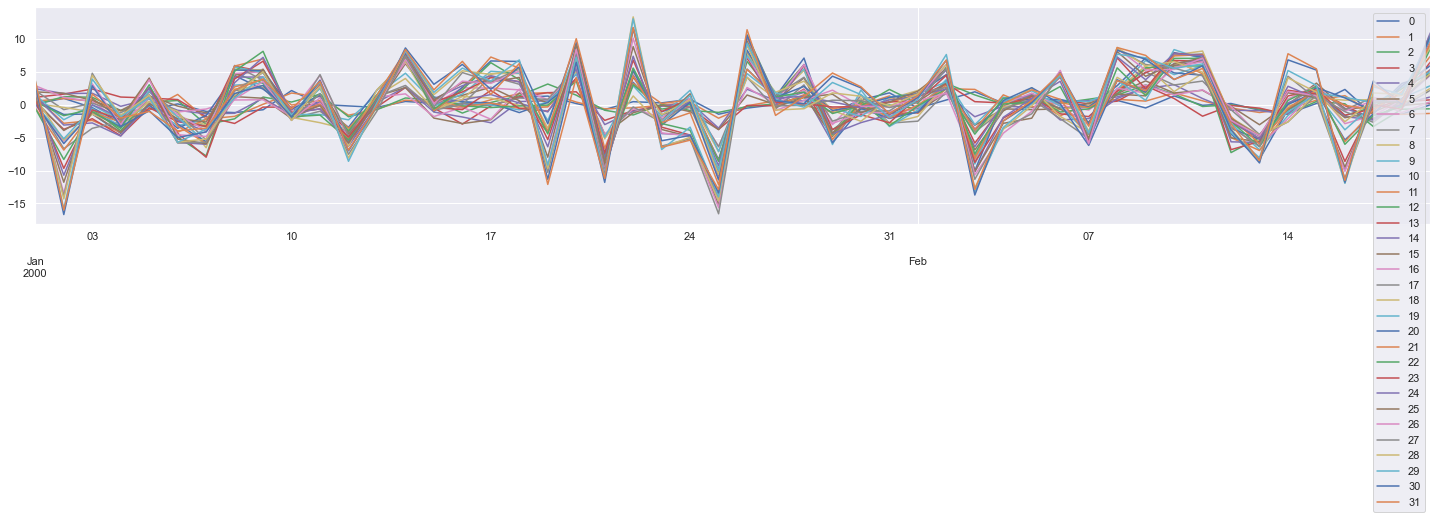

In [12]:
data.plot(figsize=(25,4))

In [13]:
from tslearn.clustering import TimeSeriesKMeans

In [14]:
X.shape
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0).fit(X)
km.cluster_centers_.shape

km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                          max_iter_barycenter=5,
                          random_state=0).fit(X)
km_dba.cluster_centers_.shape

(50, 32, 1)

(3, 32, 1)

(3, 32, 1)

In [15]:
km.predict(X)
km_dba.predict(X)

array([0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1,
       0, 0, 1, 0, 0, 2], dtype=int64)

array([0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 0], dtype=int64)

# k-means
This example uses k-means clustering for time series. Three variants of the algorithm are available: standard Euclidean k-means, DBA-k-means (for DTW Barycenter Averaging [1]) and Soft-DTW k-means [2].

In the figure below, each row corresponds to the result of a different clustering. In a row, each sub-figure corresponds to a cluster. It represents the set of time series from the training set that were assigned to the considered cluster (in black) as well as the barycenter of the cluster (in red).

A note on pre-processing
- https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html#sphx-glr-auto-examples-clustering-plot-kmeans-py

In [16]:
from tslearn.datasets import CachedDatasets
import numpy
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes

In [17]:
show(X_train)

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0.54407,0.65786,0.61124,0.54541,0.53216,0.59301,0.59528,0.53828,0.56343,0.59596,...,0.58823,0.57789,0.59807,0.58369,0.60288,0.55426,0.51415,0.60377,0.59633,0.58322
1,0.76643,0.62463,0.74225,0.66822,0.76612,0.73068,0.65511,0.72933,0.72365,0.70282,...,0.68619,0.68500,0.65401,0.68998,0.64181,0.67280,0.61673,0.72218,0.66786,0.72445
2,-1.70500,-1.73910,-1.72570,-1.80170,-1.74250,-1.76040,-1.69160,-1.68750,-1.76150,-1.77480,...,0.64928,0.64069,0.62599,0.61621,0.61688,0.65652,0.59599,0.60164,0.65616,0.58226
3,0.54137,0.57191,0.56215,0.52095,0.52749,0.60404,0.54052,0.58038,0.50058,0.59781,...,0.58600,0.62647,0.60962,0.55428,0.53947,0.53352,0.55775,0.50783,0.51377,0.52813
4,0.64599,0.58009,0.61606,0.61071,0.61860,0.61274,0.56405,0.62056,0.53794,0.63609,...,0.57600,0.61296,0.53630,0.63200,0.64606,0.66054,0.61221,0.58414,0.64785,0.59292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-2.03400,-2.02330,-1.99960,-2.02640,-2.04040,-1.99610,-2.04470,-1.99600,-2.06830,-2.01340,...,0.53315,0.56185,0.54537,0.54050,0.52819,0.52108,0.53407,0.57997,0.56166,0.59310
65,0.60653,0.62571,0.63304,0.62139,0.60973,0.56836,0.61511,0.62784,0.61174,0.56173,...,0.57223,0.65894,0.55759,0.53845,0.54657,0.55469,0.56967,0.58465,0.63383,0.55859
66,0.74781,0.76297,0.73012,0.68065,0.77179,0.66561,0.73768,0.76279,0.72582,0.73755,...,0.75198,0.64260,0.78138,0.76449,0.74109,0.66191,0.68592,0.71661,0.67864,0.72428
67,0.67424,0.69950,0.72477,0.73695,0.67882,0.66796,0.66676,0.62970,0.61887,0.67119,...,0.63183,0.63022,0.64352,0.60495,0.61276,0.60509,0.59466,0.68093,0.61272,0.65020


In [18]:
import numpy
arr = np.arange(15).reshape((3, 5))
arr
np.random.shuffle(arr)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4]])

### 데이터 전처리 TimeSeriesScalerMeanVariance은 instance를 기준으로 표준화

In [19]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
show(arr)
show(TimeSeriesScalerMeanVariance().fit_transform(arr))

,0,1,2,3,4
0,10,11,12,13,14
1,5,6,7,8,9
2,0,1,2,3,4


,0,1,2,3,4
0,-1.414214,-0.707107,0.0,0.707107,1.414214
1,-1.414214,-0.707107,0.0,0.707107,1.414214
2,-1.414214,-0.707107,0.0,0.707107,1.414214


In [20]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
numpy.random.shuffle(X_train)

In [21]:
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
show(X_train).shape

(50, 275)

In [22]:
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
X_train.shape
show(X_train).shape

(50, 40, 1)

(50, 40)

## 3가지 클러스터 알고리즘 시각화

Euclidean k-means
16.434 --> 9.437 --> 9.437 --> 


<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 1')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 2')

Text(0.5, 1.0, 'Euclidean $k$-means')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 3')

DBA k-means
Init 1
0.637 --> 0.458 --> 0.458 --> 
Init 2
0.826 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.525 --> 0.477 --> 0.472 --> 0.472 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 1')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 2')

Text(0.5, 1.0, 'DBA $k$-means')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 3')

Soft-DTW k-means
0.472 --> 0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 1')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 2')

Text(0.5, 1.0, 'Soft-DTW $k$-means')

<AxesSubplot:>

(0.0, 40.0)

(-4.0, 4.0)

Text(0.55, 0.85, 'Cluster 3')

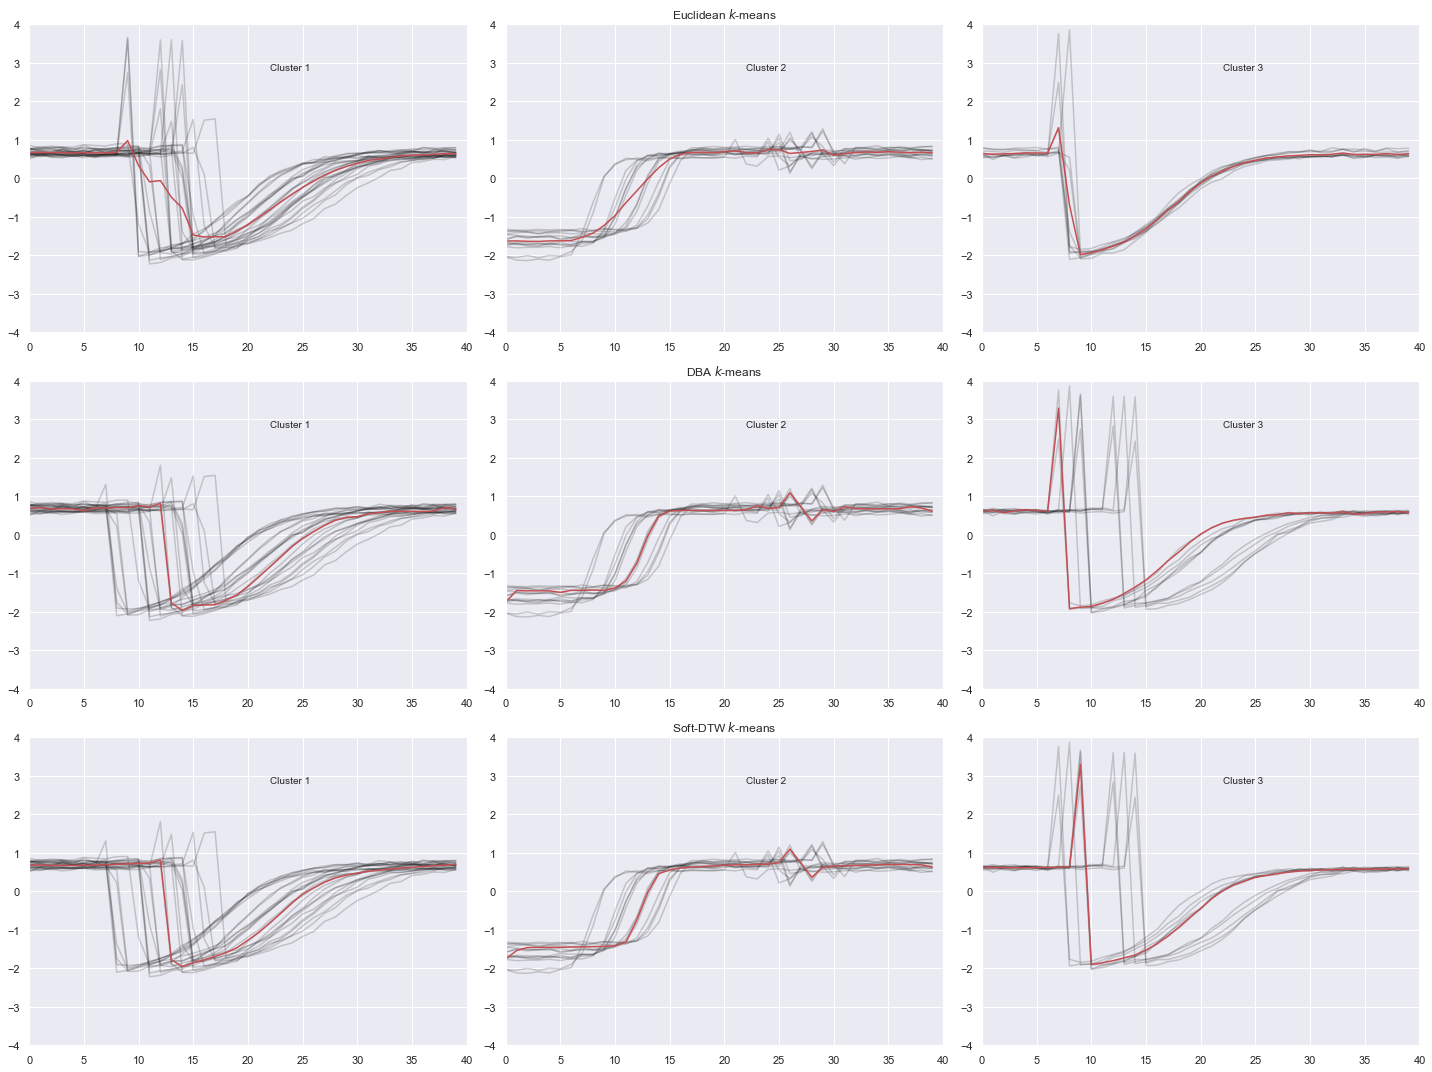

In [23]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(20,15))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 539.5, -0.5, 539.5)

(-26.950000000000003, 565.95, -1.0497999999999998, 3.9398)

(0.0, 539.0)

(-3.9398, 1.0497999999999998, -26.950000000000003, 565.95)

(0.0, 539.0)

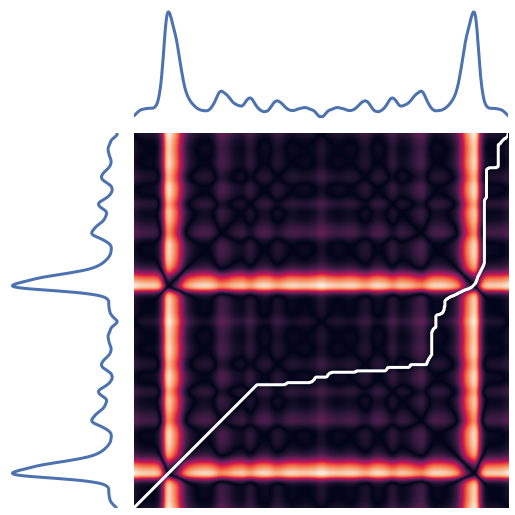

In [21]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

from tslearn import metrics

numpy.random.seed(0)

s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821])

s_y1 = numpy.concatenate((s_x, s_x)).reshape((-1, 1))
s_y2 = numpy.concatenate((s_x, s_x[::-1])).reshape((-1, 1))
sz = s_y1.shape[0]

path, sim = metrics.dtw_path(s_y1, s_y2)

plt.figure(1, figsize=(8, 8))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(s_y1, s_y2)

ax_gram.imshow(mat, origin='lower')
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(numpy.arange(sz), s_y2, "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- s_y1, numpy.arange(sz), "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()

# End